In [44]:
import pandas as pd

# file path
file_path = "../../data/bodyfat.csv"

# load CSV to DataFrame
df = pd.read_csv(file_path)

# Check the first 5 rows of the DataFrame
print(df.head())

   Density  BodyFat  Age  Weight  Height  Neck  Chest  Abdomen    Hip  Thigh  \
0   1.0708     12.3   23  154.25   67.75  36.2   93.1     85.2   94.5   59.0   
1   1.0853      6.1   22  173.25   72.25  38.5   93.6     83.0   98.7   58.7   
2   1.0414     25.3   22  154.00   66.25  34.0   95.8     87.9   99.2   59.6   
3   1.0751     10.4   26  184.75   72.25  37.4  101.8     86.4  101.2   60.1   
4   1.0340     28.7   24  184.25   71.25  34.4   97.3    100.0  101.9   63.2   

   Knee  Ankle  Biceps  Forearm  Wrist  
0  37.3   21.9    32.0     27.4   17.1  
1  37.3   23.4    30.5     28.9   18.2  
2  38.9   24.0    28.8     25.2   16.6  
3  37.3   22.8    32.4     29.4   18.2  
4  42.2   24.0    32.2     27.7   17.7  


In [45]:
# stanrdize the data
df = (df - df.mean()) / df.std()

# Check the first 5 rows of the DataFrame
print(df.head())

    Density   BodyFat       Age    Weight    Height      Neck     Chest  \
0  0.800055 -0.818617 -1.736617 -0.839575 -0.654901 -0.737198 -0.916224   
1  1.561952 -1.559469 -1.815970 -0.193078  0.573648  0.208949 -0.856916   
2 -0.744758  0.734783 -1.815970 -0.848082 -1.064418 -1.642207 -0.595958   
3  1.025997 -1.045652 -1.498561  0.198223  0.573648 -0.243556  0.115746   
4 -1.133588  1.141057 -1.657265  0.181210  0.300637 -1.477660 -0.418032   

    Abdomen       Hip     Thigh      Knee     Ankle    Biceps   Forearm  \
0 -0.682176 -0.754427 -0.077325 -0.535067 -0.709414 -0.090496 -0.625474   
1 -0.886199 -0.168168 -0.134468 -0.535067  0.175598 -0.586975  0.116847   
2 -0.431783 -0.098375  0.036962  0.128337  0.529602 -1.149652 -1.714210   
3 -0.570890  0.180797  0.132201 -0.535067 -0.178407  0.041899  0.364287   
4  0.690345  0.278507  0.722682  1.496607  0.529602 -0.024299 -0.477010   

      Wrist  
0 -1.210133  
1 -0.031879  
2 -1.745703  
3 -0.031879  
4 -0.567449  


In [46]:
# create x_train and y_train
x_train = df.drop(columns=['BodyFat'])
y_train = df['BodyFat']


# Check the first 5 rows of the DataFrame
print(x_train.head())
print(y_train.head())

    Density       Age    Weight    Height      Neck     Chest   Abdomen  \
0  0.800055 -1.736617 -0.839575 -0.654901 -0.737198 -0.916224 -0.682176   
1  1.561952 -1.815970 -0.193078  0.573648  0.208949 -0.856916 -0.886199   
2 -0.744758 -1.815970 -0.848082 -1.064418 -1.642207 -0.595958 -0.431783   
3  1.025997 -1.498561  0.198223  0.573648 -0.243556  0.115746 -0.570890   
4 -1.133588 -1.657265  0.181210  0.300637 -1.477660 -0.418032  0.690345   

        Hip     Thigh      Knee     Ankle    Biceps   Forearm     Wrist  
0 -0.754427 -0.077325 -0.535067 -0.709414 -0.090496 -0.625474 -1.210133  
1 -0.168168 -0.134468 -0.535067  0.175598 -0.586975  0.116847 -0.031879  
2 -0.098375  0.036962  0.128337  0.529602 -1.149652 -1.714210 -1.745703  
3  0.180797  0.132201 -0.535067 -0.178407  0.041899  0.364287 -0.031879  
4  0.278507  0.722682  1.496607  0.529602 -0.024299 -0.477010 -0.567449  
0   -0.818617
1   -1.559469
2    0.734783
3   -1.045652
4    1.141057
Name: BodyFat, dtype: float64


In [47]:
# train the model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

# print the model coefficients
print(model.coef_)
print(model.intercept_)


[-9.35200003e-01  1.89540965e-02  3.53079785e-02 -3.49303427e-03
 -8.26571729e-03  2.69778905e-02  2.39207520e-02  1.64070828e-02
 -1.05130041e-02 -1.33692450e-03 -1.73517017e-02 -1.98743891e-02
  8.17656421e-03  8.19373367e-04]
5.155261641838396e-15


In [48]:
# predict the body fat  
x_new = x_train.loc[0].values.reshape(1, -1)
y_new = model.predict(x_new)
print(y_new)
print(y_train[0])


[-0.84627324]
-0.818617057368312


c:\Users\bax\miniconda3\envs\igor_dsi\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [49]:
# evaluate the model
from sklearn.metrics import mean_squared_error

y_pred = model.predict(x_train)
mse = mean_squared_error(y_train, y_pred)
print(mse)

0.02180603587449379


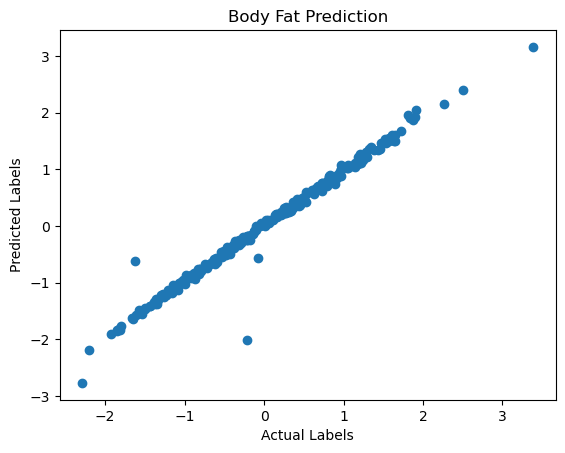

In [50]:
# plot the model
import matplotlib.pyplot as plt

plt.scatter(y_train, y_pred)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Body Fat Prediction')
plt.show()

In [ ]:
# feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

selector = SelectKBest(score_func=f_regression, k=100)
x_new = selector.fit_transform(x_train, y_train)

# print(x_new)

# train the model
model = LinearRegression() 

model.fit(x_new, y_train)

# print the model coefficients
print(model.coef_)
print(model.intercept_)

# predict the body fat
x_new = x_train.loc[0].values.reshape(1, -1)
x_new = selector.transform(x_new)
y_new = model.predict(x_new)

print(y_new)


[-9.35200003e-01  1.89540965e-02  3.53079785e-02 -3.49303427e-03
 -8.26571729e-03  2.69778905e-02  2.39207520e-02  1.64070828e-02
 -1.05130041e-02 -1.33692450e-03 -1.73517017e-02 -1.98743891e-02
  8.17656421e-03  8.19373367e-04]
5.155261641838396e-15
[-0.84627324]


c:\Users\bax\miniconda3\envs\igor_dsi\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=100 is greater than n_features=14. All the features will be returned.
  warnings.warn(
c:\Users\bax\miniconda3\envs\igor_dsi\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SelectKBest was fitted with feature names
  warnings.warn(


In [60]:
# evaluate the model
y_pred = model.predict(selector.transform(x_train))
mse = mean_squared_error(y_train, y_pred)
print(mse)

0.02180603587449379


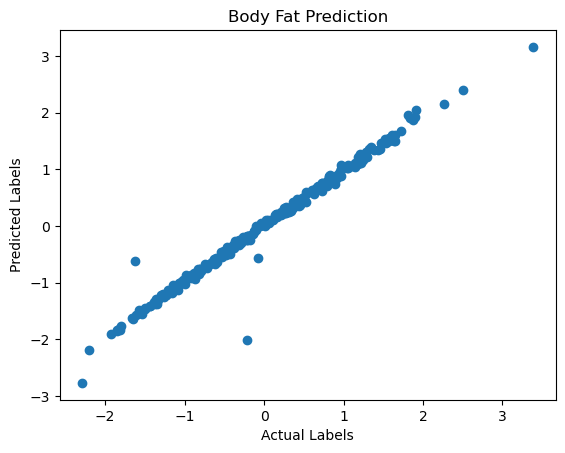

In [61]:

# plot the model

plt.scatter(y_train, y_pred)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Body Fat Prediction')
plt.show()